In [82]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
sb.set()

pd.options.display.max_rows = 999



In [83]:
life_transform = pd.read_csv("dataset/life_transform.csv")
life_transform.drop(columns=life_transform.columns[0],axis=1,inplace=True)
print("Data dimensions", life_transform.shape)
life_transform.head()

Data dimensions (2938, 21)


,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,0.806913,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,0.766886,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,0.749863,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,0.883365,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,0.888946,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


*Updated descriptions of dataset*
>**1) Country**: Country <br>
>**2) Year**: Year in which the data is collected, ranges from `2000` to `2015`. A total of `16` years per country <br>
>**3) Status**: Whether country is developing or developed <br>
>**4) Life expectancy**: Life expectancy in age <br>
>**5) Adult Mortality**: ~Probability of dying Number~ Percentage of deaths between `15` and `60` years ~per `1000` population~. Both male and female. `(%)` <br>
>**6) Infant deaths**: ~Number~ Percentage of Infant Deaths ~per `1000` population~ `(%)` <br>
>**7) Alcohol**: Alcohol consumption (in litres of pure alcohol), per capita (15+) <br>
>**8) Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita`(%)` <br>
>**9) Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds `(%)` <br>
>**10) Measles**: Measles - ~number~ Percentage of reported cases in population `(%)` ~per `1000` population~ <br>
>**11) BMI**: Average Body Mass Index of entire population <br>
>**12) under-five-deaths**: ~Number~ Percentage of under-five deaths in population ~per `1000` population~ `(%)`<br>
>**13) Polio**: Polio (Pol3) immunization coverage among 1-year-olds `(%)` <br>
>**14) Total expenditure**: General government expenditure on health as a percentage of total government expenditure `(%)` <br>
>**15) Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds `(%)` <br>
>**16) HIV/AIDS**: Percentage of live births who died from HIV/AIDS (0-4 years)`(%)` <br>
>**17) GDP**:Gross Domestic Product per capita (in USD) <br>
>**18) Population**: Population <br>
>**19) Thinness 5-19 years**: Prevalence of thinness among children and adolescents for Age `5` to `19` `(%)` <br>
>**20) Income composition**:Human Development Index in terms of income composition of resources (index ranging from `0` to `1`) <br>
>**21) Schooling**: Number of years of Schooling(years) <br>

In [84]:
life_transform.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   COUNTRY                          2938 non-null   object 
 1   STATUS                           2938 non-null   int64  
 2   YEAR                             2938 non-null   float64
 3   LIFE_EXPECTANCY                  2938 non-null   float64
 4   ADULT_MORTALITY                  2938 non-null   float64
 5   INFANT_DEATHS                    2938 non-null   float64
 6   ALCOHOL                          2938 non-null   float64
 7   PERCENTAGE_EXPENDITURE           2938 non-null   float64
 8   HEPATITIS_B                      2938 non-null   float64
 9   MEASLES                          2938 non-null   float64
 10  BMI                              2938 non-null   float64
 11  UNDER_FIVE_DEATHS                2938 non-null   float64
 12  POLIO               

In [85]:
# lifeEx = lifeEx.drop(['Unnamed: 0'],axis=1)
# lifeEx = lifeEx.drop(['COUNTRY'],axis=1)
# lifeEx = lifeEx.drop(['STATUS'],axis=1)

life_transform.describe()


,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2938.000000
mean,0.825732,2007.518720,0.501309,0.497070,0.498657,-1.876572e-16,-7.742842e-17,0.506461,0.431738,38.790629,0.484631,0.509762,4.402348e-17,0.505652,0.308969,-4.586755e-16,1.053540e-16,-2.648966e-16,0.498775,12.340658
std,0.379405,4.613841,0.278344,0.280640,0.272273,1.000170e+00,1.000170e+00,0.295571,0.340305,20.485912,0.295749,0.302967,1.000170e+00,0.298637,0.389081,1.000170e+00,1.000170e+00,1.000170e+00,0.284977,3.649192
min,0.000000,2000.000000,0.000000,0.000000,0.000000,-1.540089e+00,-2.312958e+00,0.000000,0.000000,1.000000,0.000000,0.000000,-3.762931e+00,0.000000,0.000000,-3.073607e+00,-2.426608e+00,-2.172591e+00,0.000000,0.000000
25%,1.000000,2004.000000,0.249396,0.253333,0.244444,-8.247969e-01,-7.858454e-01,0.245138,0.000000,19.400000,0.230769,0.244444,-5.484182e-01,0.255556,0.000000,-7.687574e-01,-6.717270e-01,-7.715521e-01,0.242630,10.300000
50%,1.000000,2008.000000,0.522222,0.495726,0.489899,1.080217e-01,-6.462024e-02,0.500000,0.487179,43.900000,0.500000,0.518519,-2.295318e-03,0.518519,0.000000,-2.444449e-02,-8.349672e-02,-2.535882e-02,0.508547,12.500000
75%,1.000000,2012.000000,0.742690,0.744048,0.766700,7.882520e-01,9.911980e-01,0.777778,0.730711,56.400000,0.767688,0.777778,5.692044e-01,0.777778,0.736111,8.016743e-01,6.764212e-01,8.014589e-01,0.748889,14.600000
max,1.000000,2015.000000,1.000000,1.000000,1.000000,2.393661e+00,1.623804e+00,1.000000,1.000000,116.135422,1.000000,1.000000,2.871616e+00,1.000000,1.000000,1.746533e+00,2.210668e+00,2.500756e+00,1.000000,26.135726


# Basic correlation exploration

We start by oberserving some relationships between various features and our **response variable, `LIFE_EXPECTANCY`**. We will do so through heatmaps first.

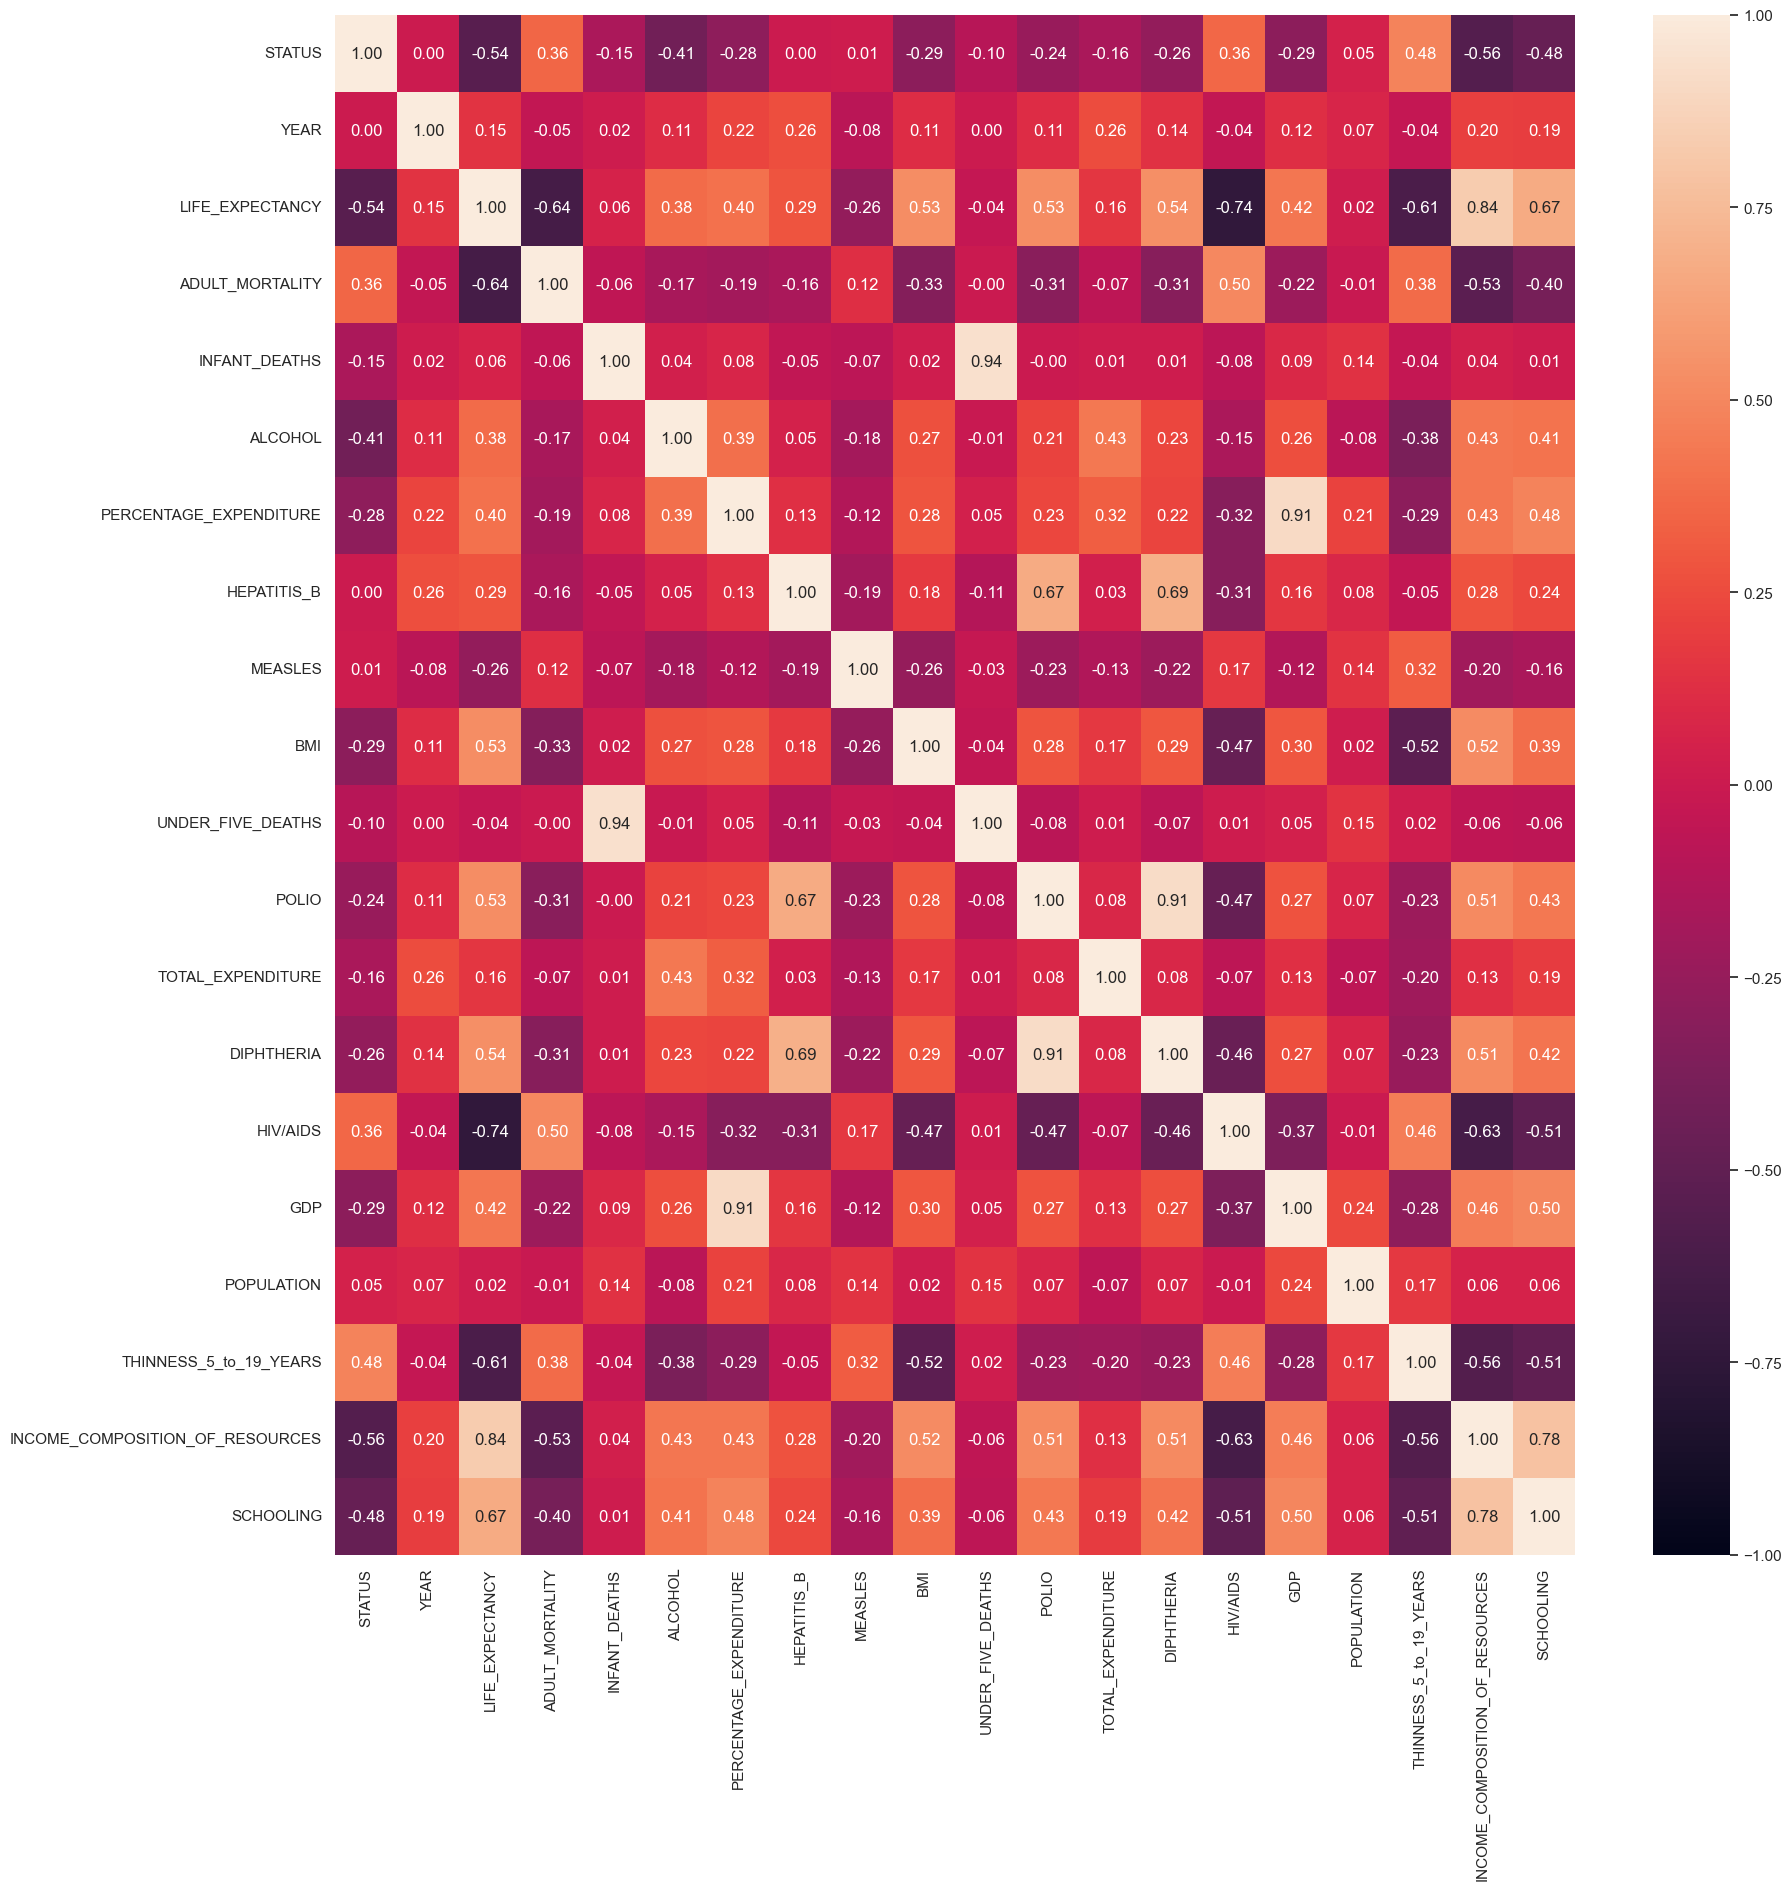

In [86]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(life_transform.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Features Correlating with Life Expectancy')

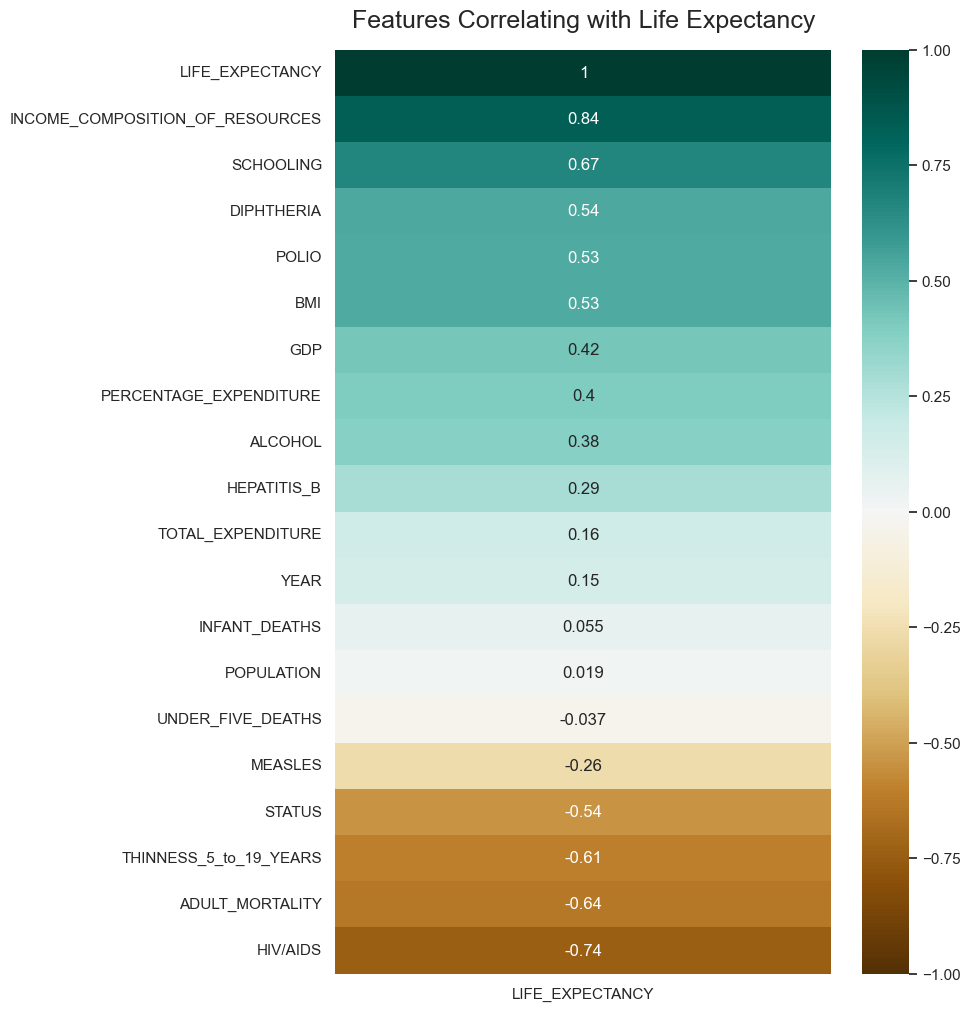

In [87]:
f=plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(life_transform.corr()[['LIFE_EXPECTANCY']].sort_values(by='LIFE_EXPECTANCY', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16)

Based on our basic observations so far, it seems like features that have a **strong positive** correlation with `LIFE_EXPECTANCY` are `SCHOOLING` and `INCOME_COMPOSITION_OF_RESOURCES` , and features that have a **strong negative** correlation with `LIFE_EXPECTANCY` are `HIV/AIDS`, `ADULT_MORTALITY` and `THINNESS_5_to_19_YEARS`, which make sense since these are often the most crippling characteristic of impoversihed nations who suffer from shorter life spans.

# Machine Learning content page

This is the start of our machine learning. Listed below is a summary of what we are going to explore.

1) Function to visualize our predictions easily<br>
2) Univariate Linear Regression<br>
3) Other Regression Models<br>

>- a) Data Spliting
>- b) Multivariate Linear Regression
>- c) Multivariate Linear Regression with feature selection
>- d) Polynomial Regression
>- e) Polynomial Regression (degree=2) with feature selection
>- f) Random Forest Regression
>- g) Random Forest Regression with feature selection
>- h) Our final verdict/choice

# Univariate Linear Regression

we start with simple univariate linear regression for 2 of the features with higest correlation to `LIFE_EXPECTANCY`, `HIV/AIDS` and `INCOME_COMPOSITION_OF_RESOURCES`. We will do them seperately.

#### `HIV/AIDS`

In [88]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
x = pd.DataFrame(life_transform['HIV/AIDS'])

# Split the Dataset into random Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (2350, 1) (2350, 1)
Test Set  : (588, 1) (588, 1)


In [89]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [0.6629109]
Coefficients 	: a =  [[-0.52685237]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5486811795363535
Mean Squared Error (MSE) 	: 0.03466836381320684

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5423748040812318
Mean Squared Error (MSE) 	: 0.0364980241683507



#### `INCOME_COMPOSITION_OF_RESOURCES`

In [90]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
x = pd.DataFrame(life_transform['INCOME_COMPOSITION_OF_RESOURCES'])

# Split the Dataset into random Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (2350, 1) (2350, 1)
Test Set  : (588, 1) (588, 1)


In [91]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept 	: b =  [0.09109633]
Coefficients 	: a =  [[0.81608282]]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6930350120116472
Mean Squared Error (MSE) 	: 0.023579725460073274

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7194435776410602
Mean Squared Error (MSE) 	: 0.02237585512153537



**Observations:** Univariate linear regression has relatively **poor performance** as indicated by very low `Explained Variance (R^2)`, which indicates that the model is not good at predicting `LIFE_EXPECTANCY` at all, which can be expected since in both cases only 1 feature is used, which is not enough.

# Other regression models selection

we will now move on to explore other regression models to see how they can improve our model accuracy and Explained Variance (R^2).

## Data spliting

To prevent overfitting on the train set leading to reduced accuracy on the test set, we will need to split the data into `TRAIN` and `TEST` before doing any form of feature selection. We split the data as early on as possible to prevent test data from contaminating our model during training.

In [92]:
# Extract Response and Predictors
y = pd.DataFrame(life_transform['LIFE_EXPECTANCY'])
X = pd.DataFrame(life_transform.loc[:,~life_transform.columns.isin(['COUNTRY','LIFE_EXPECTANCY'])])

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0) # set the seed so its reproduceable
# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

Train Set : (2350, 19) (2350, 1)
Test Set  : (588, 19) (588, 1)


## Multivariate linear regression

We will first do a naive regression of using every feature to predict `LIFE_EXPECTANCY` and check how well this naive model does. We will

Intercept 	: b =  [-2.72267027]
Coefficients 	: a =  [[-4.90384357e-02  1.60942512e-03 -1.82123117e-01 -1.25633601e-02
   4.34622323e-03  1.48316043e-02 -4.19341003e-02 -5.36022043e-02
   1.54399022e-04 -7.33701742e-03  2.11193007e-02  3.65545422e-03
   8.89682649e-02 -1.95111022e-01 -9.98069069e-03  4.08351442e-03
  -2.76468316e-02  3.89095639e-01 -1.50968976e-03]]


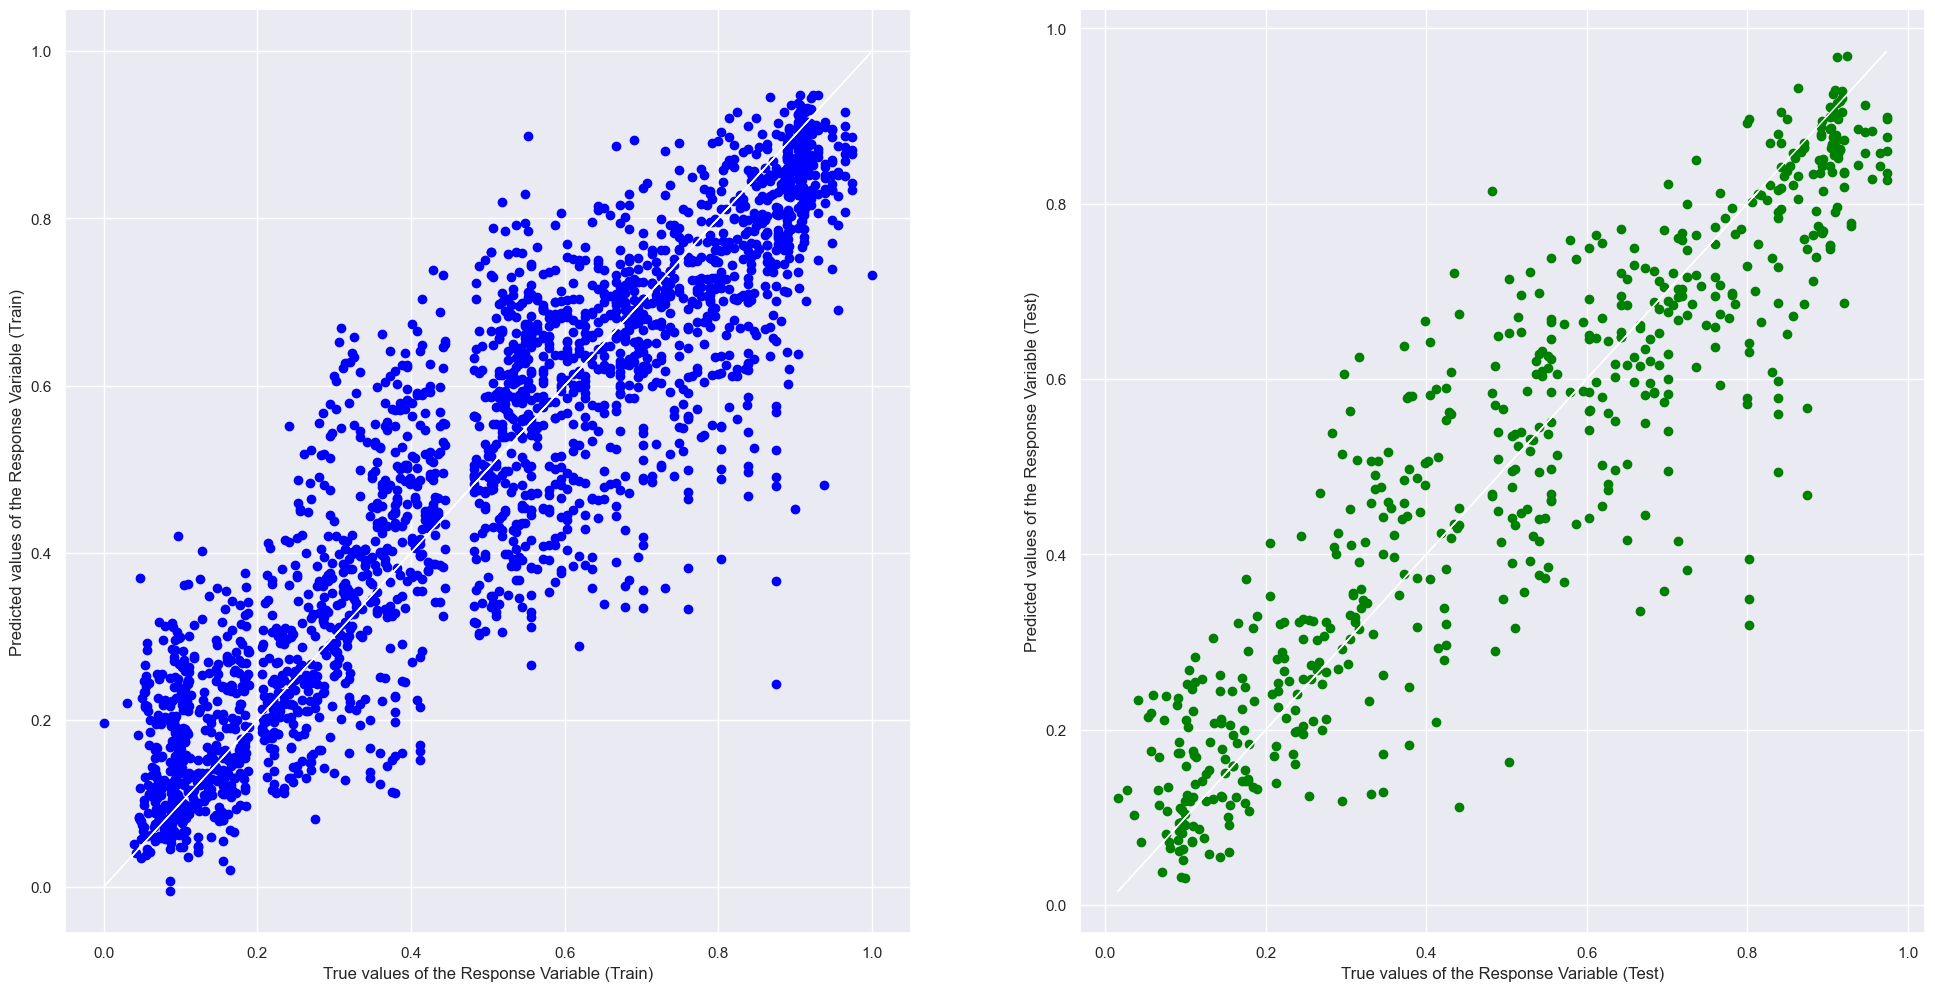

In [93]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [94]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
print('K-fold Cross validation score:',cross_val_score(linreg, X_train, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684102
Mean Squared Error (MSE) 	: 0.013421869731714295

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8399811999724183
Mean Squared Error (MSE) 	: 0.012762343688422837

K-fold Cross validation score: 0.8199291996833041



## Multivariate linear regression with Feature Selection

We have decided to use SelectKBest from scikit learn to select the top 10 features to see if this improves model accurracy by reducing overfitting. Note that we are only learning the relationship on the **TRAIN** data and **NOT** on the **TEST** data. After receiving the top 10 features we will **do the same transformations** on **both TRAIN AND TEST**. This is to prevent informational leakage.

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['STATUS', 'YEAR', 'ADULT_MORTALITY', 'ALCOHOL',
       'PERCENTAGE_EXPENDITURE', 'HEPATITIS_B', 'MEASLES', 'BMI', 'POLIO',
       'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'THINNESS_5_to_19_YEARS',
       'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING'],
      dtype='object')

Intercept 	: b =  [-2.8908401]
Coefficients 	: a =  [[-4.59452110e-02  1.68301128e-03 -1.81879035e-01  4.80707220e-03
   1.85048357e-02 -4.05300970e-02 -5.07959862e-02  1.96710046e-04
   2.33181312e-02  8.81919359e-02 -1.93166394e-01 -1.24963870e-02
  -2.71699065e-02  3.89799402e-01 -1.28664726e-03]]


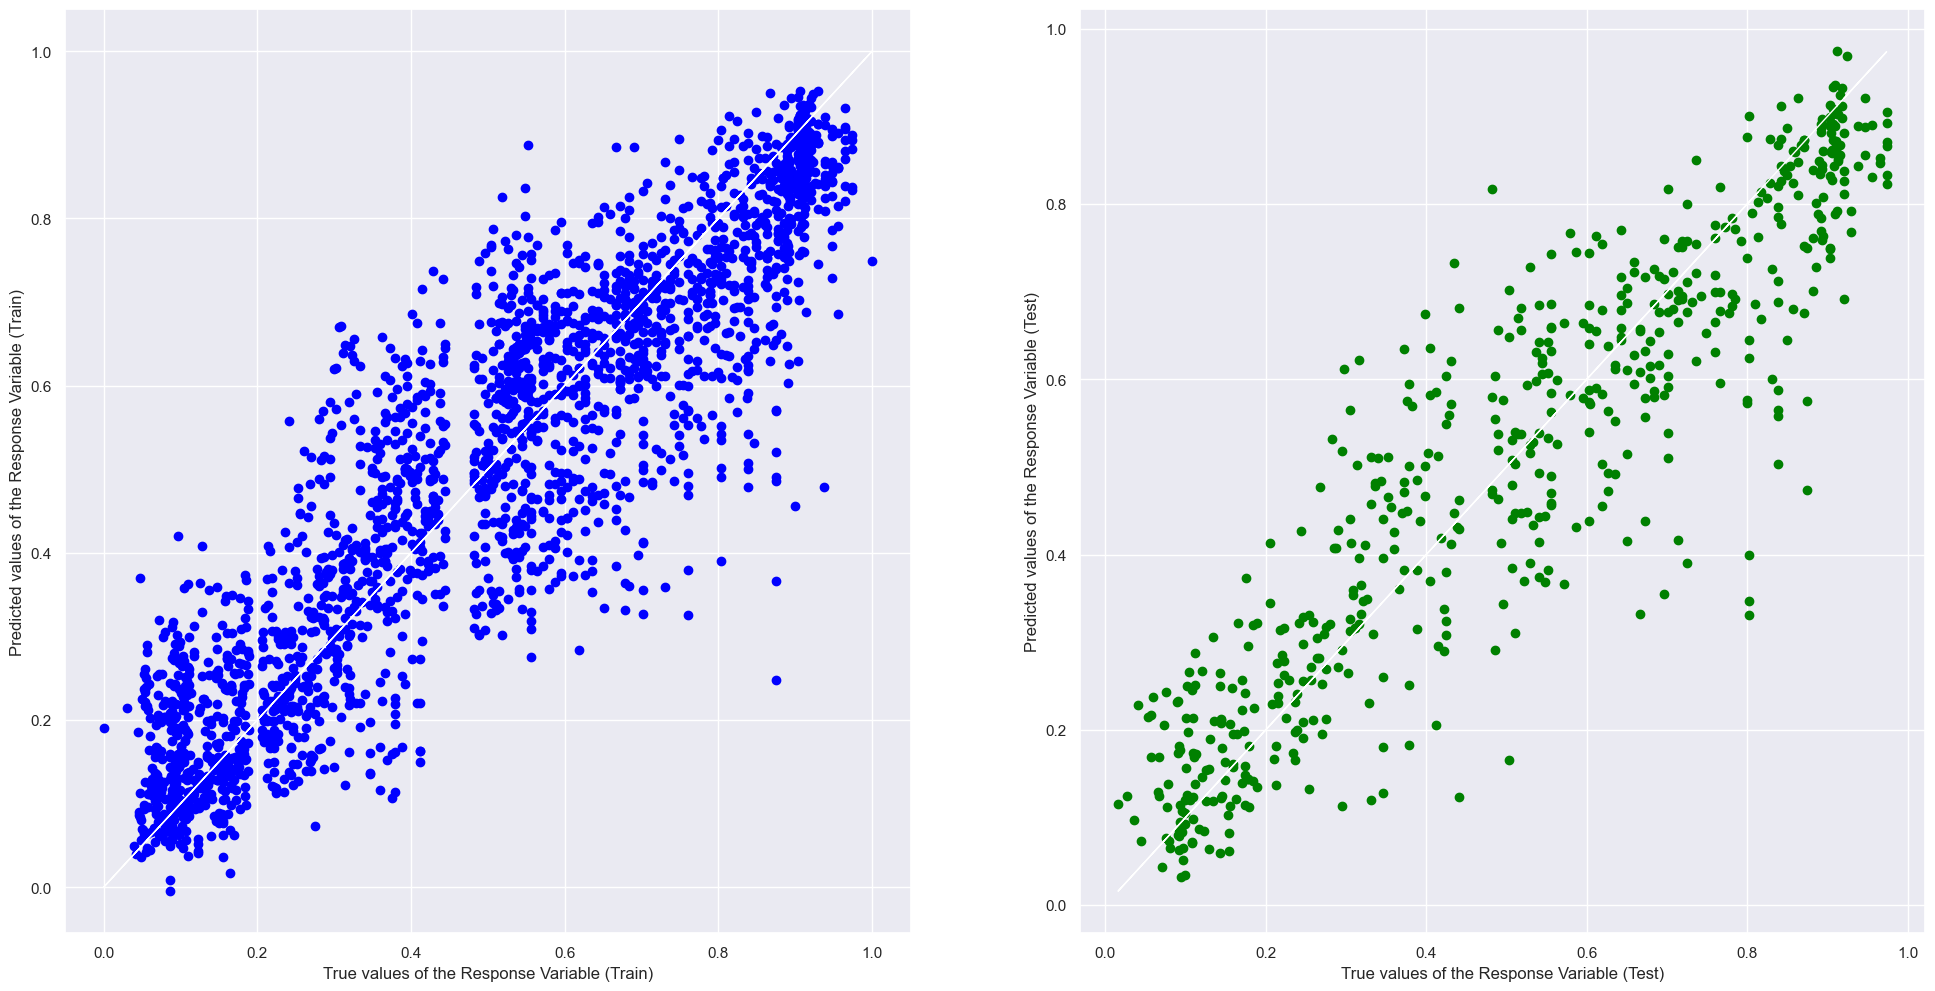

In [114]:
linreg = LinearRegression()
linreg.fit(X_train_fs, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(X_train_fs)
y_test_pred = linreg.predict(X_test_fs)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [115]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test_fs, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
print('K-fold Cross validation score:',cross_val_score(linreg, X_train_fs, y_train, cv=5).mean())
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8246952548700589
Mean Squared Error (MSE) 	: 0.013466153873447519

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8398317258235505
Mean Squared Error (MSE) 	: 0.012774265040539315

K-fold Cross validation score: 0.8201038330540813



we do not see much of a improvement, there is really no distinguishable difference between Multivariate Linear Regression with only the top 10 features and every single feature together. Other K values have been tried but to no clearly distinguishable difference.

## Polynomial Regression

We will try polynomial regression with degrees from 1 to 5 and see if that better fits our data

In [123]:
from sklearn.preprocessing import PolynomialFeatures
maxscore=0
bestDegree=0

for i in range(1,5):

    poly_reg=PolynomialFeatures(degree=i)
    X_train_poly=poly_reg.fit_transform(X_train)
    X_test_poly=poly_reg.fit_transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly,y_train)
    print("Polynomial degree is:",i)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)
    print()
    
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", poly_reg.score(X_train_poly, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()


    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", poly_reg.score(X_test_poly, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()
    
    KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
    print('K-fold Cross validation score:',KfoldScore)
    print()
    if KfoldScore > maxscore:
        maxscore=KfoldScore
        bestDegree=i

print("The most optimum degree is",bestDegree,"with a score of",maxscore)



Polynomial degree is: 1
Intercept 	: b =  [-2.8908401]
Coefficients 	: a =  [[-4.59452110e-02  1.68301128e-03 -1.81879035e-01  4.80707220e-03
   1.85048357e-02 -4.05300970e-02 -5.07959862e-02  1.96710046e-04
   2.33181312e-02  8.81919359e-02 -1.93166394e-01 -1.24963870e-02
  -2.71699065e-02  3.89799402e-01 -1.28664726e-03]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8252717535684103
Mean Squared Error (MSE) 	: 0.013421869731714288

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8399811999724183
Mean Squared Error (MSE) 	: 0.012762343688422838

K-fold Cross validation score: 0.819929199683304

Polynomial degree is: 2
Intercept 	: b =  [-2.8908401]
Coefficients 	: a =  [[-4.59452110e-02  1.68301128e-03 -1.81879035e-01  4.80707220e-03
   1.85048357e-02 -4.05300970e-02 -5.07959862e-02  1.96710046e-04
   2.33181312e-02  8.81919359e-02 -1.93166394e-01 -1.24963870e-02
  -2.71699065e-02  3.89799402e-01 -1.28664726e-03]]

Goodness of Fit of Mode

We can also see that as degree goes beyond 2, Explained Variance (R^2) for train set becomes very high, but for test set it drops drastically, this is a **clear sign of overfitting.** Furthermore, after degree 5 the accuracy scores **go down drastically** so there **no need to explore beyond 5.**

Thus we will go with **degree 2 polynomial regression.**

Intercept 	: b =  [-2.8908401]
Coefficients 	: a =  [[-4.59452110e-02  1.68301128e-03 -1.81879035e-01  4.80707220e-03
   1.85048357e-02 -4.05300970e-02 -5.07959862e-02  1.96710046e-04
   2.33181312e-02  8.81919359e-02 -1.93166394e-01 -1.24963870e-02
  -2.71699065e-02  3.89799402e-01 -1.28664726e-03]]


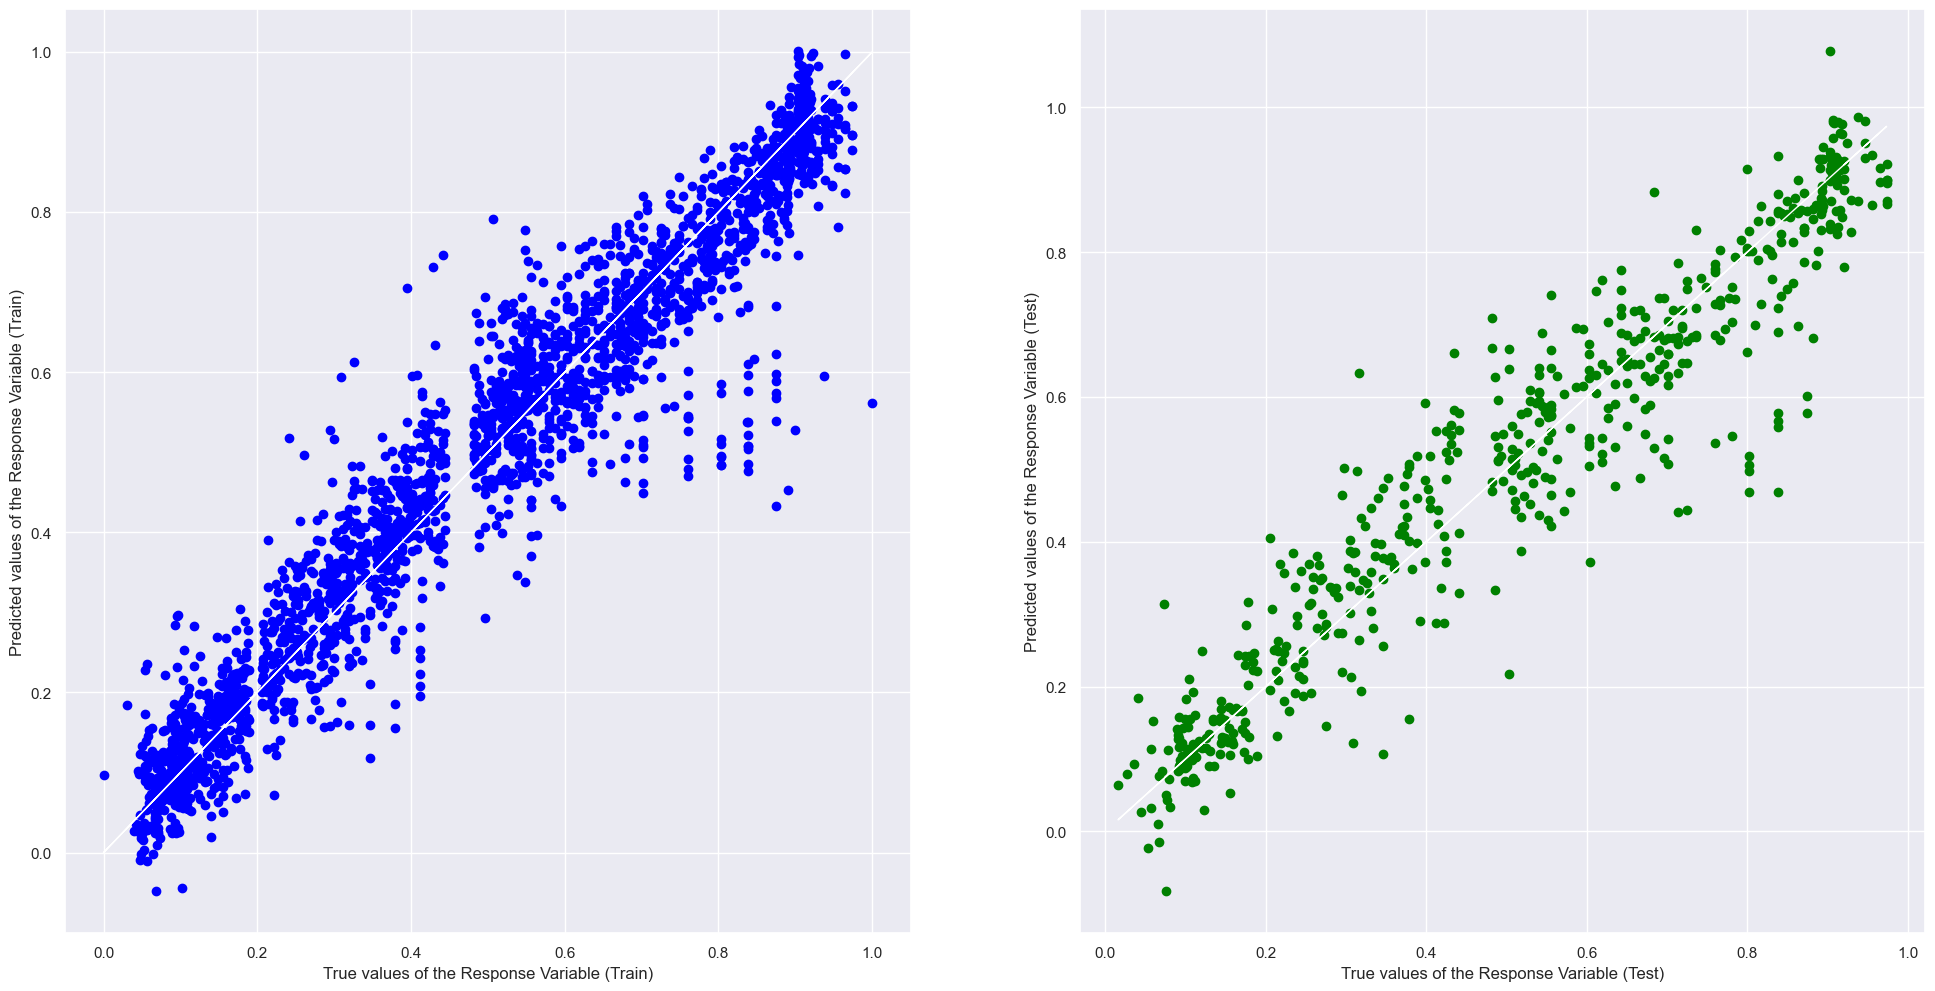

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_poly=poly_reg.fit_transform(X_train)
X_test_poly=poly_reg.fit_transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly,y_train)

y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [125]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_train_poly, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_test_poly, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(poly_reg, X_train_poly, y_train, cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9264722082595483
Mean Squared Error (MSE) 	: 0.0056480876020657995

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9061664242596725
Mean Squared Error (MSE) 	: 0.007483722805728457

K-fold Cross validation score: 0.8994351355561119


## Polynomial Regression (degree=2) with feature selection

We have decided to use SelectKBest from scikit learn to select the top 10 features to see if this improves model accurracy by reducing overfitting. Note that we are only learning the relationship on the **TRAIN** data and **NOT** on the **TEST** data. After receiving the top 10 features we will **do the same transformations** on **both TRAIN AND TEST**. This is to prevent informational leakage.

In [132]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS',
       'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES',
       'SCHOOLING'],
      dtype='object')

Intercept 	: b =  [-2.8908401]
Coefficients 	: a =  [[-4.59452110e-02  1.68301128e-03 -1.81879035e-01  4.80707220e-03
   1.85048357e-02 -4.05300970e-02 -5.07959862e-02  1.96710046e-04
   2.33181312e-02  8.81919359e-02 -1.93166394e-01 -1.24963870e-02
  -2.71699065e-02  3.89799402e-01 -1.28664726e-03]]


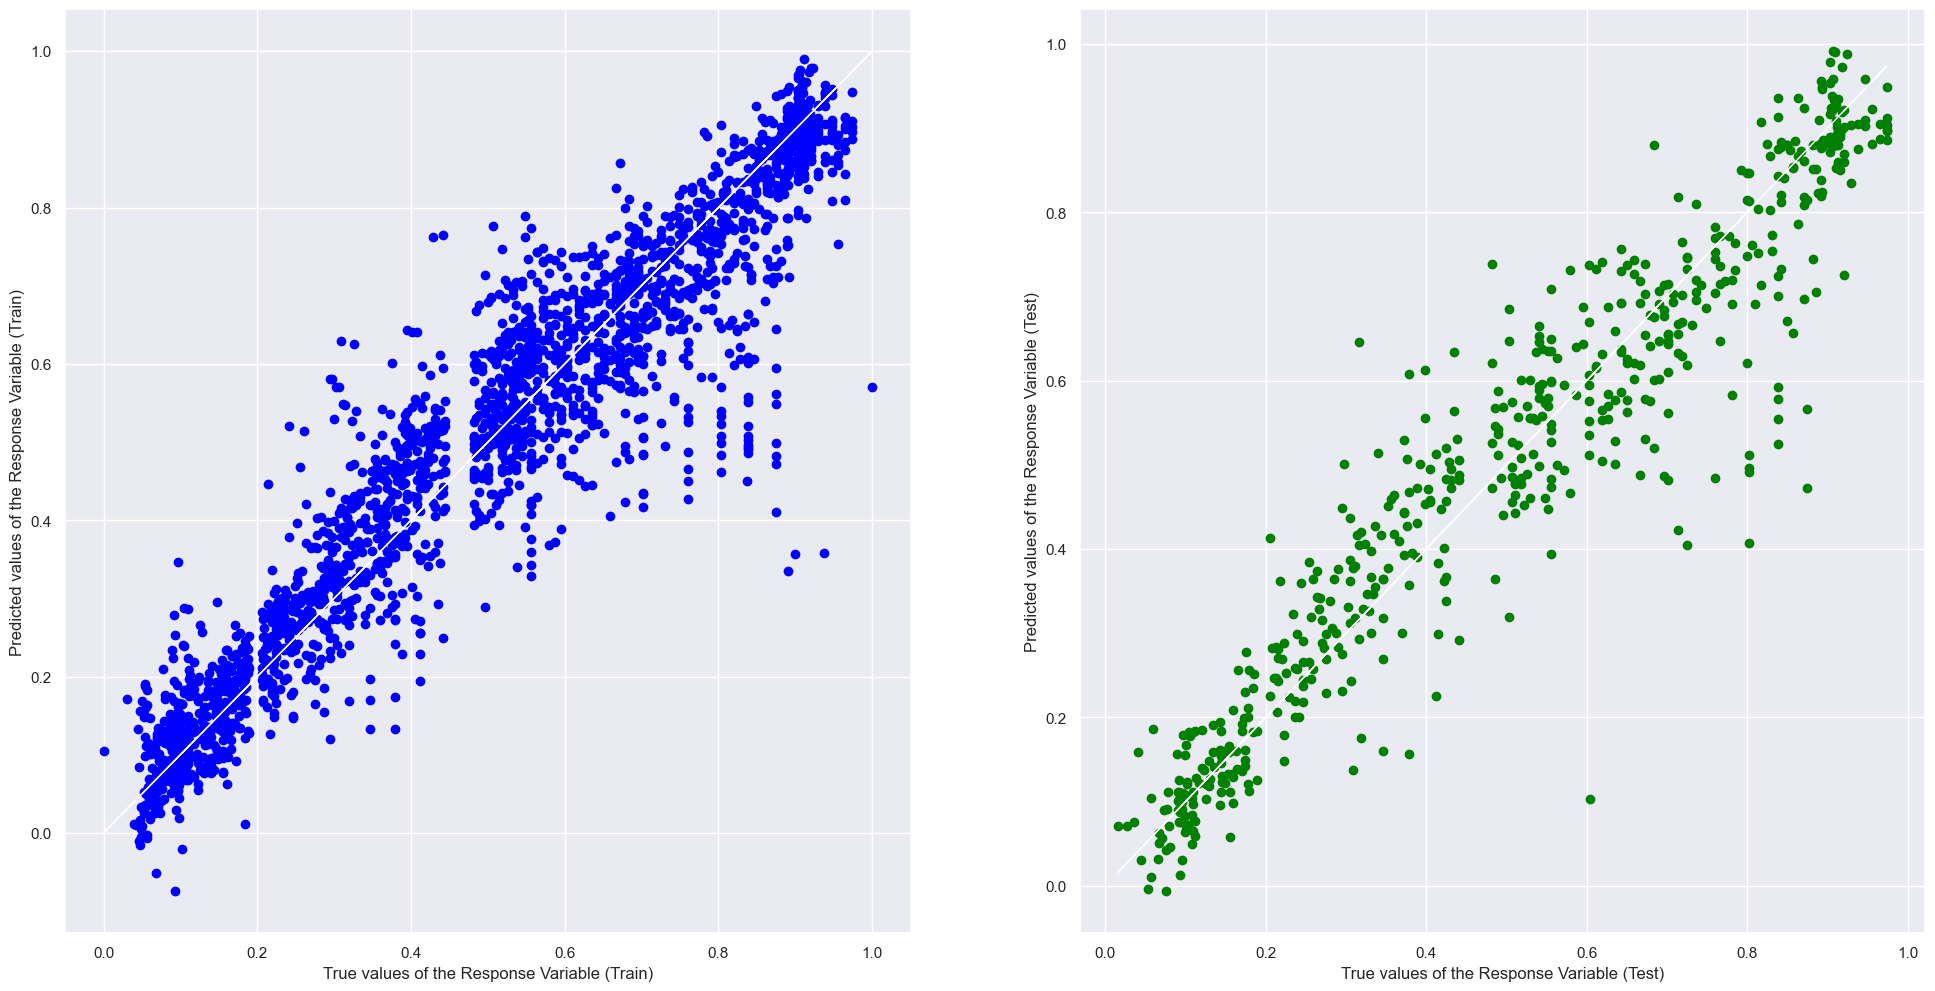

In [133]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_fs_poly=poly_reg.fit_transform(X_train_fs)
X_test_fs_poly=poly_reg.fit_transform(X_test_fs)

poly_reg = LinearRegression()
poly_reg.fit(X_train_fs_poly,y_train)

y_train_pred = poly_reg.predict(X_train_fs_poly)
y_test_pred = poly_reg.predict(X_test_fs_poly)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [134]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_train_fs_poly, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", poly_reg.score(X_test_fs_poly, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(poly_reg, X_train_fs_poly, y_train, cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9026704039235517
Mean Squared Error (MSE) 	: 0.007476439478203799

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9027290662162177
Mean Squared Error (MSE) 	: 0.007757870247923827

K-fold Cross validation score: 0.8907471239121021


Once again, we do not see much of a improvement, there is really no distinguishable difference between Polynomial Regression with only the top 10 features and every single feature together. Other K values have been tried but to no clearly distinguishable difference.

## Random Forest Regression

In [153]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

### Model Random Forest Regression

In [154]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [155]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

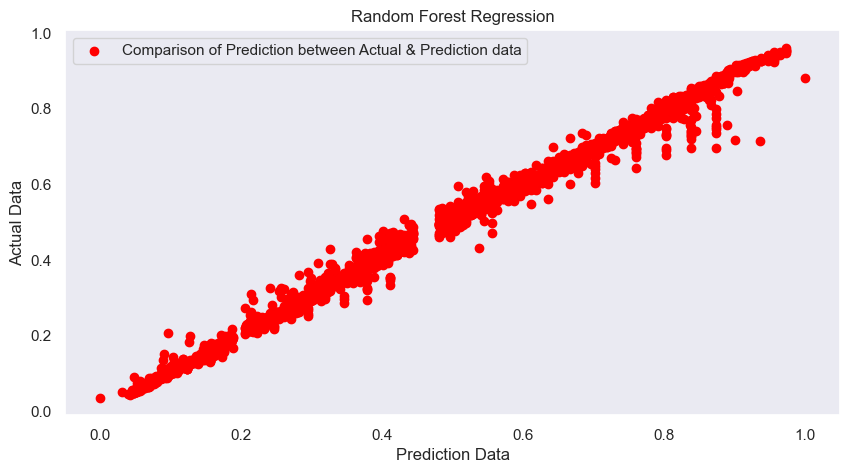

In [158]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

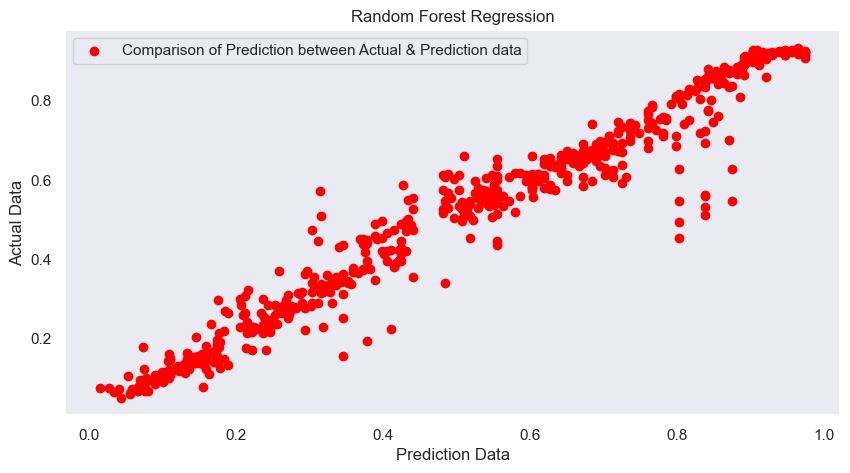

In [157]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [159]:
# # plot the first 3 trees in the random forest
# f, axes = plt.subplots(nrows = 1,ncols = 3, figsize=(300, 90), dpi=80)
# for index in range(3):
#     plot_tree(regressor.estimators_[index],
#               filled = True,
#               ax = axes[index],
#               feature_names=X_train.columns,
#               fontsize=7)

#     axes[index].set_title('Estimator: ' + str(index))
# plt.show()

KeyboardInterrupt: 

In [163]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.993193878042767
Mean Squared Error (MSE) 	: 0.0005228169122838819

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.954850927572075
Mean Squared Error (MSE) 	: 0.0036008767684756727

K-fold Cross validation score: 0.9393676683457644


## Random Forest Regression with feature selection

In [164]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import plot_tree

In [165]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    
    # learn relationship from training data ONLY
    fs.fit(X_train, y_train)
    
    #transform BOTH train and TEST
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs


# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f ' % (i, fs.scores_[i]))
   
#what are the features
X.columns[fs.get_support()]

Feature 0: 931.632690 
Feature 1: 62.121055 
Feature 2: 1596.325284 
Feature 3: 8.123077 
Feature 4: 387.431139 
Feature 5: 460.896530 
Feature 6: 221.037494 
Feature 7: 184.867789 
Feature 8: 977.376065 
Feature 9: 3.136827 
Feature 10: 916.584162 
Feature 11: 61.120337 
Feature 12: 939.608160 
Feature 13: 2854.530658 
Feature 14: 513.190948 
Feature 15: 1.277854 
Feature 16: 1316.357030 
Feature 17: 5301.080813 
Feature 18: 1746.096913 


C:\Users\TdrDi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['STATUS', 'ADULT_MORTALITY', 'BMI', 'POLIO', 'DIPHTHERIA', 'HIV/AIDS',
       'GDP', 'THINNESS_5_to_19_YEARS', 'INCOME_COMPOSITION_OF_RESOURCES',
       'SCHOOLING'],
      dtype='object')

### Model Random Forest Regression

In [166]:
regressor=RandomForestRegressor(n_estimators=1000,random_state=42)
regressor.fit(X_train_fs,y_train.values.ravel())

RandomForestRegressor(n_estimators=1000, random_state=42)

### Check Output

In [167]:
y_train_pred=regressor.predict(X_train_fs)
y_test_pred=regressor.predict(X_test_fs)
y_train_pred=pd.DataFrame(y_train_pred,columns=['yPredict'])
y_test_pred=pd.DataFrame(y_test_pred,columns=['yPredict'])

### Scatter Plot

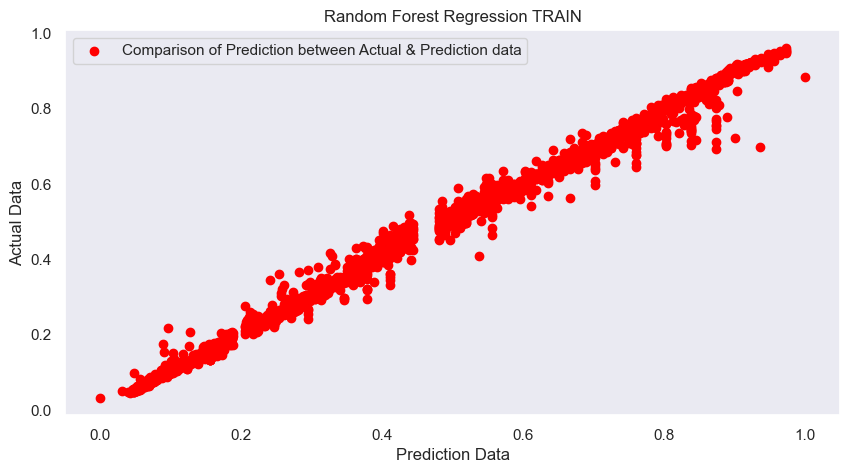

In [168]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,y_train_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TRAIN')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

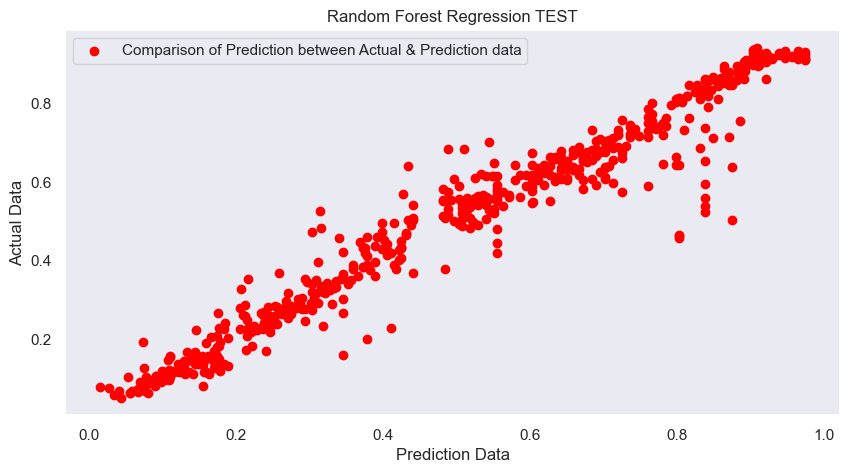

In [169]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_test_pred,color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression TEST')
plt.xlabel('Prediction Data')
plt.ylabel('Actual Data')
plt.show()

In [170]:
# # plot the first 3 trees in the random forest
# f, axes = plt.subplots(nrows = 1,ncols = 3, figsize=(300, 90), dpi=80)
# for index in range(3):
#     plot_tree(regressor.estimators_[index],
#               filled = True,
#               ax = axes[index],
#               feature_names=X_train.columns,
#               fontsize=7)

#     axes[index].set_title('Estimator: ' + str(index))
# plt.show()

In [171]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_train_fs, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", regressor.score(X_test_fs, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

KfoldScore=cross_val_score(regressor, X_train_fs, y_train.values.ravel(), cv=5).mean()
print('K-fold Cross validation score:',KfoldScore)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9927308089244349
Mean Squared Error (MSE) 	: 0.0005583878832629066

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9523223602165546
Mean Squared Error (MSE) 	: 0.0038025433578071544

K-fold Cross validation score: 0.9364449112371689


Once again, we do not see much of a improvement, there is really no distinguishable difference between Polynomial Regression with only the top 10 features and every single feature together. Other K values have been tried but to no clearly distinguishable difference.

# Final verdict

We conclude that Random Forest Regressor is the most suitable model for our dataset since it has achieved a very high Explained Variance (R^2) for both **TRAIN** and **TEST** sets. Thus we will be using Random Forest Regressor and improving on it in the next steps.

In [13]:

numplot = len(lifeEx.columns[1:])
numrows = (numplot+3)//4
f, axes = plt.subplots(nrows= numrows, ncols = 4, figsize = (16,4))
count = 0
for i, column in enumerate(lifeEx.columns[1:]):
    #plt.subplots(4, 4)
    row = i/4
    col = 1 % 4
    plt.scatter(lifeEx['LIFE_EXPECTANCY'], lifeEx[i], ax = axes[row][col] )
    plt.ylabel('Life expectancy', size = 15, ax = axes[row][col] )
    plt.xlabel(i, size = 15, ax = axes[row][col] )
    plt.show()


NameError: name 'lifeEx' is not defined

In [ ]:
plt.figure(figsize=(20,20),dpi=100)

for index, var in enumerate(lifeEx.columns[1:]):
    plt.subplot(4,5, index+1)
    plt.scatter(lifeEx[var],lifeEx['LIFE_EXPECTANCY'])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(var,size=12)

In [ ]:
predictors = pd.DataFrame(lifeEx[["SCHOOLING", "LIFE_EXPECTANCY"]])
predictors

In [ ]:
predictors.corr()

In [ ]:
schooling = pd.DataFrame(lifeEx["SCHOOLING"])
lifeExpectancy = pd.DataFrame(lifeEx["LIFE_EXPECTANCY"])

In [ ]:
2938*0.2

In [ ]:
2938-588

In [ ]:
#Train Set : 2350 samples
schoolingTrain = pd.DataFrame(schooling[-2350:])
lifeExTrain = pd.DataFrame(lifeExpectancy[-2350:])

# Test Set: 588 Samples
schoolingTest = pd.DataFrame(schooling[:588])
lifeExTest = pd.DataFrame(lifeExpectancy[:588]) 

print("Train Set :", schoolingTrain.shape, lifeExTrain.shape)
print("Test Set :", schoolingTest.shape, lifeExTest.shape)

In [ ]:
schoolingTrain.info

In [ ]:
schoolingTrain.describe()

In [149]:
lifeExTrain.describe()

,LIFE_EXPECTANCY
count,2350.000000
mean,69.439432
std,9.319304
min,36.300000
25%,63.500000
50%,72.000000
75%,75.800000
max,91.933283


<AxesSubplot:>

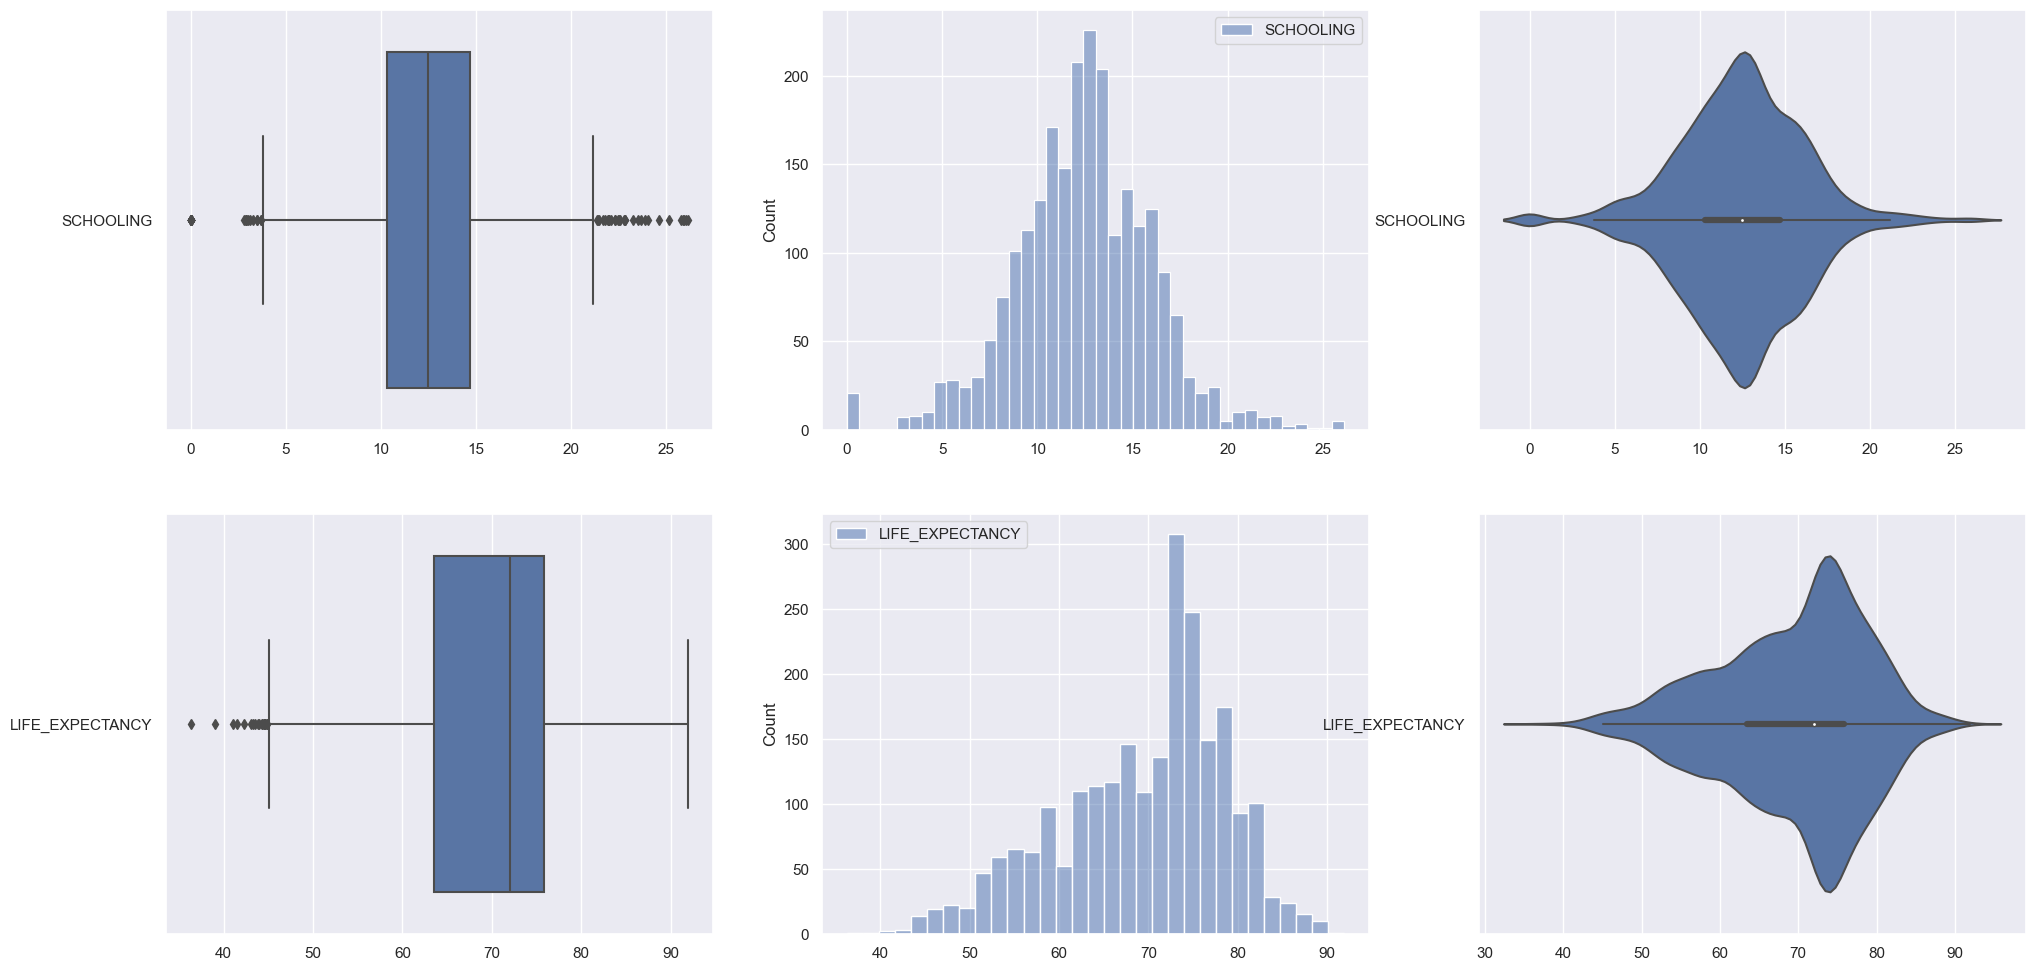

In [150]:
f,axes = plt.subplots(2, 3, figsize = (24,12))

# Plot the basic uni-varitae figures for garageArea Train data
sb.boxplot (data = schoolingTrain, orient = 'h', ax = axes[0,0])
sb.histplot (data = schoolingTrain, ax = axes [0,1])
sb.violinplot (data = schoolingTrain, orient = 'h', ax = axes [0,2])

# Plot the basic uni-variate figures for salePrice Train Data
sb.boxplot (data = lifeExTrain, orient = 'h', ax = axes[1,0])
sb.histplot (data = lifeExTrain, ax = axes[1,1])
sb.violinplot (data = lifeExTrain, orient = 'h',ax = axes[1,2])

In [151]:
trainDF = pd.concat([schoolingTrain, lifeExTrain], axis = 1)
trainDF

,SCHOOLING,LIFE_EXPECTANCY
588,11.6,72.4
589,11.5,71.8
590,11.4,71.5
591,11.3,71.4
592,11.1,63.5
...,...,...
2933,9.2,44.3
2934,9.5,44.5
2935,10.0,44.8
2936,9.8,45.3


In [152]:
trainDF.corr()

,SCHOOLING,LIFE_EXPECTANCY
SCHOOLING,1.000000,0.638801
LIFE_EXPECTANCY,0.638801,1.000000


<AxesSubplot:>

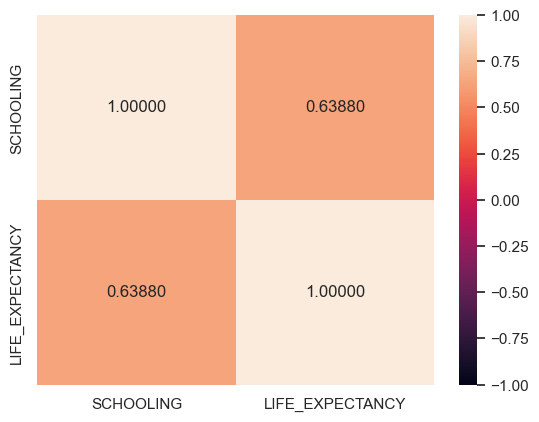

In [153]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, robust = True, annot = True, fmt = ".5f", square = False)
#sb.heatmap(trainDF.corr(), annot = True, fmt = ".5f", linecolor = 'red')

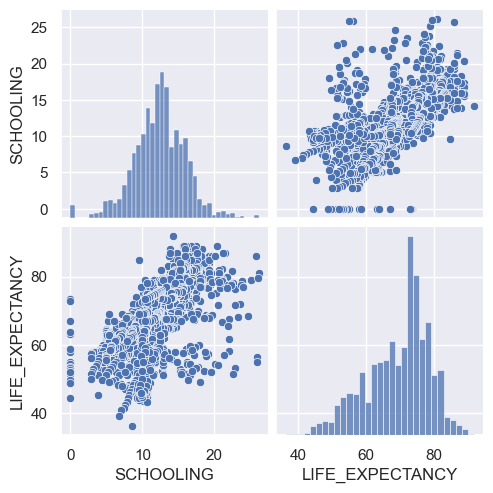

In [154]:
sb.pairplot(data = trainDF)

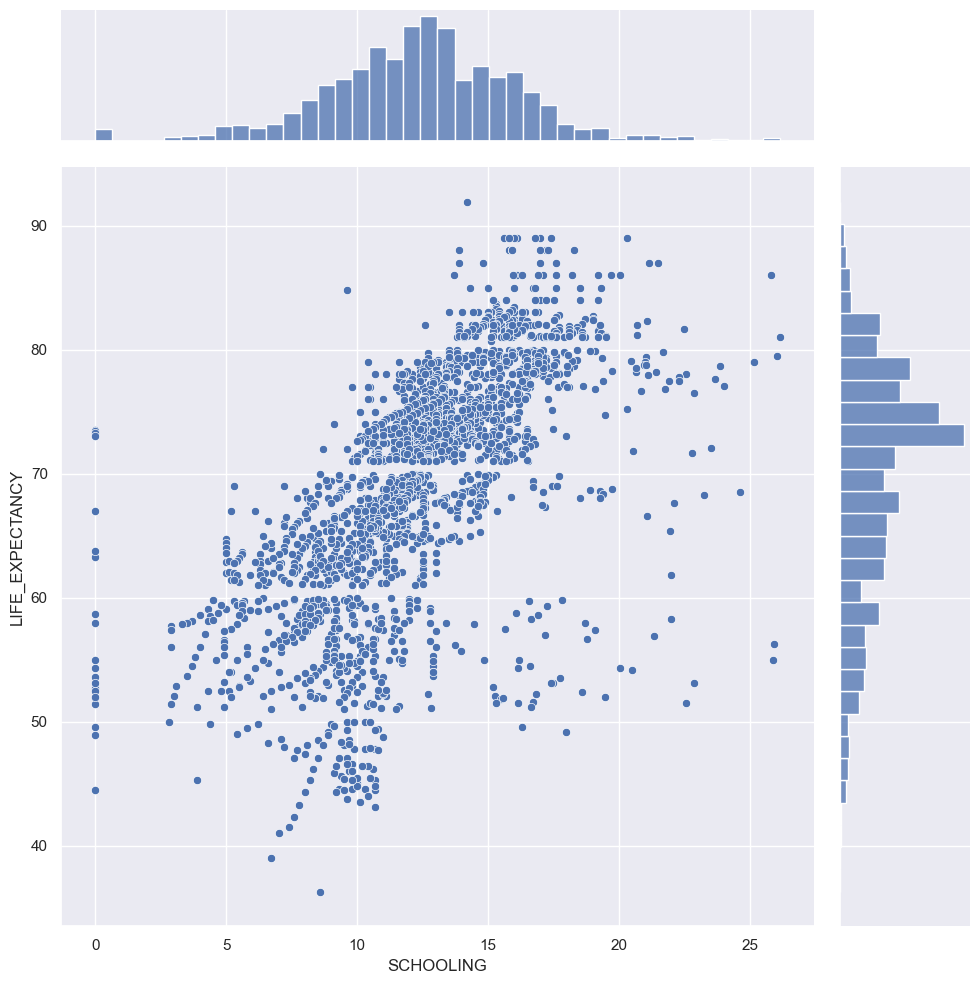

In [155]:
sb.jointplot(data=trainDF, x = 'SCHOOLING', y = 'LIFE_EXPECTANCY', height=10)

In [156]:
##Linear Regression

In [2]:
linreg=LinearRegression()
linreg.fit(schoolingTrain, lifeExTrain)

NameError: name 'LinearRegression' is not defined

In [158]:
SOMETHING

NameError: name 'SOMETHING' is not defined

In [1]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficiencts \t: a=', linreg.coef_)


NameError: name 'linreg' is not defined

In [ ]:
#Drawing the linear model line
lifeExTrainPred = linreg.predict(schoolingTrain)

In [ ]:
f = plt.figure(figsize=(16, 8))
plt.scatter(schoolingTrain, lifeExTrain)
plt.scatter(schoolingTrain, lifeExTrainPred, color = "g")
plt.show()

## CHECKING GOODNESS OF FIT OF THE MODEL
# Metrics : Explained Variance and Mean Squared Error

In [ ]:
print("Explained Variance (R^2) \t:", linreg.score(schoolingTrain, lifeExTrain))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(schoolingTrain, lifeExTrainPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



In [ ]:
lifeExTestPred = linreg.predict(schoolingTest)

# Plot the Predictions
f = plt.figure(figsize=(16, 16))
plt.scatter(schoolingTest, lifeExTest, color = "green")
plt.scatter(schoolingTest, lifeExTestPred, color = "white")
plt.show()

In [159]:
print("Explained Variance (R^2) \t:",linreg.score(schoolingTest, lifeExTest))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(schoolingTest, lifeExTestPred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.4221627445056725
Mean Squared Error (MSE) 	: 3230.550902525629
Root Mean Squared Error (RMSE) 	: 56.837935417515205


#For now the r^2 aint looking good but I guess can use this to say looking at one variable is not enough to tell the whole picture?


##REGRESSION WITH RANDOM TRAIN TEST DATA SPLIT

In [ ]:

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Schooling, lifeExpectancy, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
#MULTI-VARIATE LINEAR REGRESSION

#Doing some logistic regression to see the relation of a developing country and their .. 
# maybe I also do the multi output regression haha idk which param yet but we'll see



#Logistics Regression


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [172]:
LogsRegDF = pd.read_csv("dataset/life_transform.csv")
print("Data dimensions", LogsRegDF.shape)
LogsRegDF.head()

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,1,2015.0,0.294686,0.802268,0.606280,-1.540089,-0.653537,0.317298,...,0.616162,0.006410,0.562634,0.171717,0.0,-0.765913,0.695802,1.863475,0.215278,10.1
1,1,Afghanistan,1,2014.0,0.187396,0.813152,0.611111,-1.540089,-0.641558,0.293245,...,0.621212,0.127778,0.567017,0.156566,0.0,-0.745047,-0.642920,1.881842,0.211111,10.0
2,2,Afghanistan,1,2013.0,0.187396,0.809070,0.615942,-1.540089,-0.643161,0.309280,...,0.626263,0.150000,0.556038,0.166667,0.0,-0.731598,0.674292,1.896363,0.202778,9.9
3,3,Afghanistan,1,2012.0,0.180763,0.814512,0.623188,-1.540089,-0.617785,0.333333,...,0.632997,0.177778,0.639925,0.181818,0.0,-0.705787,-0.011252,1.914304,0.193056,9.8
4,4,Afghanistan,1,2011.0,0.175788,0.818594,0.628019,-1.540089,-1.506529,0.340278,...,0.639731,0.183333,0.497836,0.186869,0.0,-1.725140,-0.073218,1.932018,0.180556,9.5


In [173]:
# dont think its necessary but maybe put the violin histo and boxplot

In [174]:
logsRegPred = pd.DataFrame(LogsRegDF[["SCHOOLING", "STATUS"]])
logsRegPred.head(n = 1000)

,SCHOOLING,STATUS
0,10.1,1
1,10.0,1
2,9.9,1
3,9.8,1
4,9.5,1
...,...,...
995,17.0,0
996,16.9,0
997,16.9,0
998,16.8,0


In [175]:
logsRegPred.shape


(2938, 2)

In [176]:
Schooling = pd.DataFrame(LogsRegDF["SCHOOLING"])
CountryStatus = pd.DataFrame(LogsRegDF["STATUS"])


In [190]:
CountryStatus = pd.get_dummies(CountryStatus, drop_first = True)
#CountryStatus['STATUS'] = 1 - CountryStatus['STATUS']
CountryStatus.sample(10)
#df_dummies['A_1'] = 1 - df_dummies['A_1']

,STATUS
2134,0
712,1
2831,1
2225,1
2868,1
483,1
1837,0
698,0
2053,0
1130,1


# 1 Means Country is Considered As Developed
# 2 Means Country is Considered As Developing

In [180]:
CountryStatus.dtypes

STATUS    int64
dtype: object

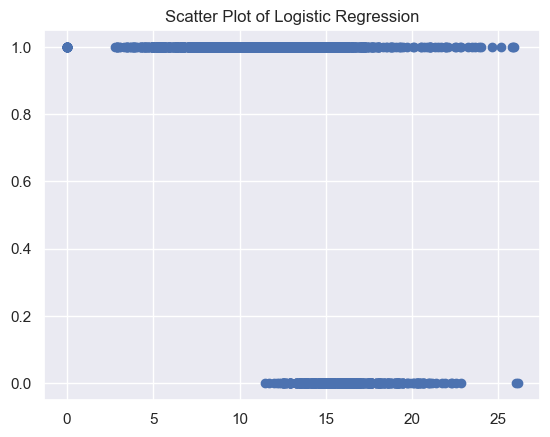

In [192]:
#colors = ['red' if CountryStatus == 1 else 'yellow']
plt.scatter(Schooling, CountryStatus,  cmap='Rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [193]:
SchoolingTrain, SchoolingTest, CountryStatusTrain, CountryStatusTest = train_test_split(Schooling, CountryStatus, test_size = 0.25)

In [194]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(SchoolingTrain, CountryStatusTrain)